<a href="https://colab.research.google.com/github/k-sasaking/taitanic-machine-learning/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# データの取得
## トレーニングデータとテストデータを取得
train_df = pd.read_csv("/content/sample_data/taitanic/train.csv")
test_df = pd.read_csv("/content/sample_data/taitanic/test.csv")


In [ ]:
##  トレーニングデータの出力
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
## テストデータの出力
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
## データの相関を取得
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
# 前処理
## 欠損地の補完
### データの欠損値チェック関数の定義
def data_check(df):
  null_val = df.isnull().sum()
  count_val = df.sum()
  print('データ数: ' + str(len(df)))
  print('欠損値の数: ')
  print(null_val)


In [ ]:
### トレーニングデータの欠損チェック
data_check(train_df)

データ数: 891
欠損値の数: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
### テストデータの欠損チェック
data_check(test_df)

データ数: 418
欠損値の数: 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Embarkedの最頻値: 
S    644
C    168
Q     77
Name: Embarked, dtype: int64
AGEの平均値: 29.69911764705882
AGEの中央値: 28.0


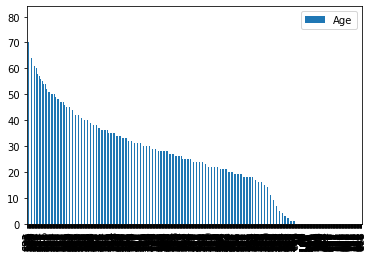

In [ ]:
### 欠損値の代理値を決める

#### Embarkedの最頻値を取得 
print('Embarkedの最頻値: ')
print(train_df['Embarked'].value_counts())


#### AGEの代表値(平均値, 中央値)を取得
print('AGEの平均値: '+ str(train_df["Age"].mean()))
print('AGEの中央値: '+ str(train_df["Age"].median()))

train_df.sort_values(by=['Age'], ascending=False).round(0).plot(kind='bar',y='Age')





In [ ]:
### Ageはテストデータの年齢の中央値  Embarkedは最頻値　をそれぞれ採用する
def lost_data(df):
  #### 欠損値を埋める処理
  df["Age"] = df["Age"].fillna(28.0)
  df["Embarked"] = df["Embarked"].fillna("S")
  return df

train_df = lost_data(train_df)
test_df = lost_data(test_df)


In [ ]:
## パラメータを数値化する
## Sex: male:0, female:1
## Embarked: S:0, C:1, Q:2
def data_converter(df):
  df["Sex"] = df["Sex"].replace("male",0).replace("female",1)
  df["Embarked"] = df["Embarked"].replace("S",0).replace("C",1).replace("Q",2)
  return df
 
tarin_df = data_converter(train_df)
test_df = data_converter(test_df)

In [ ]:
### トレーニングデータ
train_df.head(10) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0
5,6,0,3,"Moran, Mr. James",0,28.0,0,0,330877,8.4583,NaN,2
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1


In [ ]:
### テストデータ
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,0
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,2
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,1
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,0


In [ ]:
### データの相関を再度確認
train_df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034212,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.182333,0.116569
Age,0.034212,-0.064910,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


Sex, Pclass, Fare, Embarkedがより相関が高いことがわかる。

In [ ]:
# データセット
from sklearn.model_selection import train_test_split

train_df_X = train_df.drop(['Cabin','Name','PassengerId','Ticket','Age','SibSp','Parch','Survived'],axis=1)
train_df_y = train_df['Survived']

test_df_X = test_df.drop(['Cabin','Name','PassengerId','Ticket','Age','SibSp','Parch'],axis=1)

(train_X, test_X ,train_y, test_y) = train_test_split(train_df_X, train_df_y, test_size = 0.2, random_state = 666)


In [ ]:
# 決定木

## 学習
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf = tree_clf.fit(train_X, train_y)


## モデルの評価
from sklearn.metrics import (roc_curve, auc, accuracy_score)

pred = tree_clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.8100558659217877

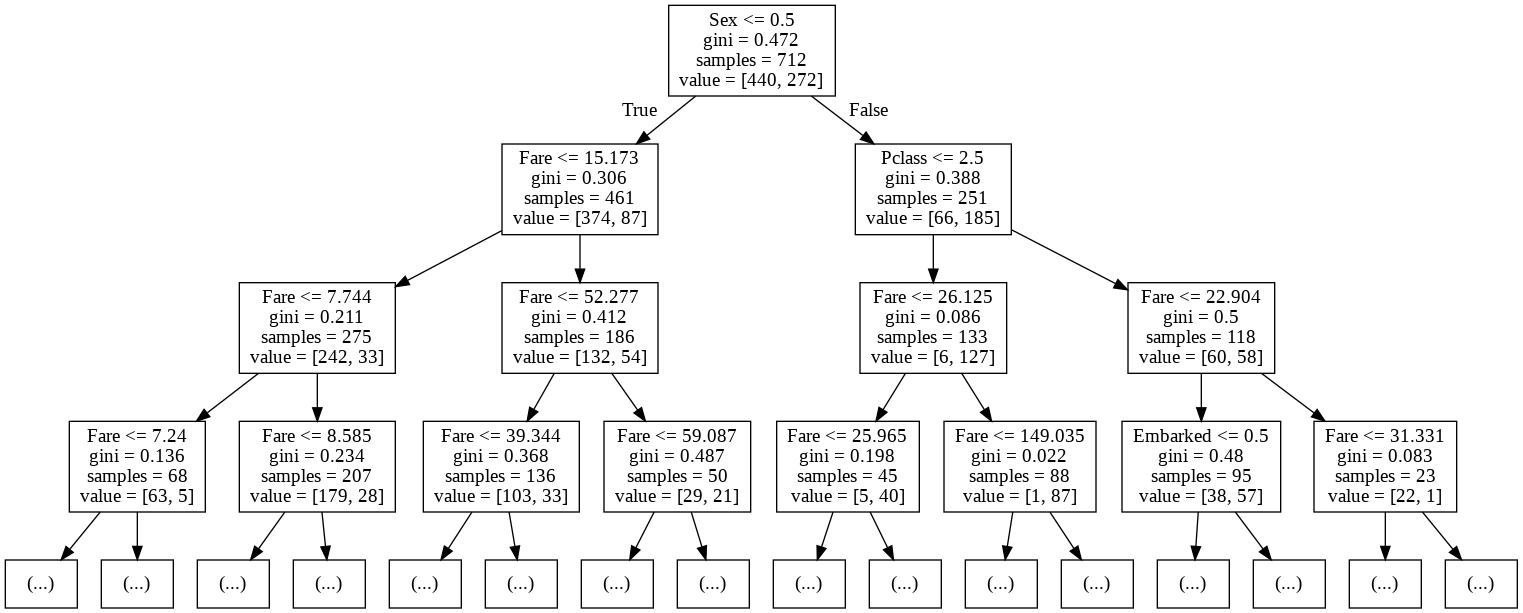

In [ ]:
#決定木のモデルの可視化
import pydotplus
from sklearn import tree
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO

dot_data = StringIO()
tree.export_graphviz(tree_clf, out_file=dot_data,feature_names=train_X.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())

In [ ]:
## モデルの評価2（クロスバリデーション)
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_clf, train_X, train_y, cv=5)
print("scores: " + str(scores))
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

scores: [0.81818182 0.82517483 0.81690141 0.79577465 0.75352113]
Accuracy: 0.80 (+/- 0.05)


In [ ]:
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

## 学習
depth = 3
leaf = 5
forest_clf = RandomForestClassifier(n_estimators=10, max_depth=depth, min_samples_leaf=leaf,random_state=666)
forest_clf = forest_clf.fit(train_X, train_y)

## モデルの評価
pred = forest_clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.7821229050279329

In [ ]:
# パラメータチューニング（グッドマンリサーチ + クロスバリデーション)
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

epths = [2, 3, 4, 5, 6, 7]
leaves = [1, 3, 5, 7, 12]
score_dict = {}

for d in depths:
    for l in leaves:
        forest_clf2 = RandomForestClassifier(n_estimators=10, max_depth=d, min_samples_leaf=l,random_state=666)
        forest_clf2 = forest_clf2.fit(train_X, train_y)
        score = cross_val_score(forest_clf2, train_X, train_y, cv=5)
        #score = forest_clf.score(train_X, train_y)
        score_dict['depth:{}, leaf:{}'.format(d, l)] = np.mean(score)

In [ ]:
score_dict

{'depth:2, leaf:1': 0.7752388456613809,
 'depth:2, leaf:12': 0.7752388456613809,
 'depth:2, leaf:3': 0.7752388456613809,
 'depth:2, leaf:5': 0.7752388456613809,
 'depth:2, leaf:7': 0.7752388456613809,
 'depth:3, leaf:1': 0.7976854131783709,
 'depth:3, leaf:12': 0.7962769624741456,
 'depth:3, leaf:3': 0.7976854131783709,
 'depth:3, leaf:5': 0.7976854131783709,
 'depth:3, leaf:7': 0.7962769624741456,
 'depth:4, leaf:1': 0.7892544075642667,
 'depth:4, leaf:12': 0.8047375160051218,
 'depth:4, leaf:3': 0.8005121638924455,
 'depth:4, leaf:5': 0.7878558061656653,
 'depth:4, leaf:7': 0.7906628582684921,
 'depth:5, leaf:1': 0.7962572638628977,
 'depth:5, leaf:12': 0.7892544075642667,
 'depth:5, leaf:3': 0.8005121638924455,
 'depth:5, leaf:5': 0.7948586624642963,
 'depth:5, leaf:7': 0.7962868117797695,
 'depth:6, leaf:1': 0.7836206047473653,
 'depth:6, leaf:12': 0.7934502117600709,
 'depth:6, leaf:3': 0.7892544075642668,
 'depth:6, leaf:5': 0.7878459568600413,
 'depth:6, leaf:7': 0.7948783610755